<a href="https://colab.research.google.com/github/Rinnah31/Evaluation_final/blob/main/notebook6a056241cc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

In [35]:
np.random.seed(42)
random.seed(42)

# Number of samples
num_samples = 1000

# Generate synthetic dataset
data ={
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Sales': np.random.randint(100, 500, size=100),
    'Customers': np.random.randint(50, 150, size=100),
    'StoreType': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'Assortment': np.random.choice(['Basic', 'Extra', 'Extended'], size=100)
}

# Create a DataFrame
df = pd.DataFrame(data)
# Define file path
file_path = 'sales_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"Dataset saved as '{file_path}'")

Dataset saved as 'sales_data.csv'


In [36]:
# Import Data
# Check if the file exists
if os.path.exists(file_path):
    # Load data
    data = pd.read_csv(file_path)
else:
    print(f"File not found: {file_path}")

In [37]:
# Describe Data
# Show basic statistics and info
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        100 non-null    object
 1   Sales       100 non-null    int64 
 2   Customers   100 non-null    int64 
 3   StoreType   100 non-null    object
 4   Assortment  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB
None
            Sales   Customers
count  100.000000  100.000000
mean   311.720000   97.370000
std    113.458227   30.293399
min    101.000000   50.000000
25%    205.750000   76.000000
50%    315.000000   93.500000
75%    408.250000  122.500000
max    489.000000  148.000000


In [38]:
data = pd.read_csv('sales_data.csv')
#used for loading data sets

In [39]:
print(data.columns)


Index(['Date', 'Sales', 'Customers', 'StoreType', 'Assortment'], dtype='object')


In [40]:
import pandas as pd

# Example data
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03']}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='raise')

print(df)


        Date
0 2023-01-01
1 2023-01-02
2 2023-01-03


In [41]:
import pandas as pd

# Your existing data
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03']}

# Convert the dictionary to a Pandas DataFrame
data = pd.DataFrame(data)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='raise')

# Now you can access datetime properties using .dt
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

print(data)

        Date  Year  Month  Day  DayOfWeek
0 2023-01-01  2023      1    1          6
1 2023-01-02  2023      1    2          0
2 2023-01-03  2023      1    3          1


In [42]:
#datetime operations
today = datetime.now()
data['DaysFromToday'] = (today - data['Date']).dt.days  # Days from today to each date
data['NextWeek'] = data['Date'] + timedelta(weeks=1)     # Date one week ahead

In [43]:
#slicing data for certain year
march_data = data[(data['Year'] == 2023) & (data['Month'] == 3)]

In [46]:
#slicing based on condition
import pandas as pd
from datetime import datetime, timedelta

# Your existing data
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03']}

# Convert the dictionary to a Pandas DataFrame
data = pd.DataFrame(data)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d', errors='raise')

# Now you can access datetime properties using .dt
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# **Add a 'Sales' column to your DataFrame**
# You can replace this with your actual sales data
import numpy as np  # Import numpy for generating random data
data['Sales'] = np.random.randint(100, 1000, size=len(data)) # Example: Random sales data

#datetime operations
today = datetime.now()
data['DaysFromToday'] = (today - data['Date']).dt.days  # Days from today to each date
data['NextWeek'] = data['Date'] + timedelta(weeks=1)     # Date one week ahead

#slicing data for certain year
march_data = data[(data['Year'] == 2023) & (data['Month'] == 3)]

#slicing based on condition
high_sales_data = data[data['Sales'] > data['Sales'].quantile(0.9)]

print(high_sales_data)

        Date  Year  Month  Day  DayOfWeek  Sales  DaysFromToday   NextWeek
1 2023-01-02  2023      1    2          0    669            675 2023-01-09


In [48]:
# Add a 'Customers' column to the DataFrame if it doesn't exist
# Replace this with your actual customer data if available

# Option 1: If you have the actual customer data:
# data['Customers'] = your_customer_data

# Option 2: If you want to generate random data for demonstration:
import numpy as np
data['Customers'] = np.random.randint(1, 50, size=len(data))  # Example: Random customer data

# Then proceed with the grouping and aggregation
grouped_data = data.groupby(['Year', 'Month']).agg({'Sales': 'mean', 'Customers': 'mean'}).reset_index()
print("Grouped Data (Year, Month):\n", grouped_data.head())

Grouped Data (Year, Month):
    Year  Month       Sales  Customers
0  2023      1  585.333333  36.666667


In [49]:
#
stacked_data = grouped_data.set_index(['Year', 'Month']).stack()      # Stack columns
print("Stacked Data:\n", stacked_data.head())

Stacked Data:
 Year  Month           
2023  1      Sales        585.333333
             Customers     36.666667
dtype: float64


In [50]:
unstacked_data = stacked_data.unstack()                               # Unstack the stacked columns
print("Unstacked Data:\n", unstacked_data.head())

Unstacked Data:
                  Sales  Customers
Year Month                       
2023 1      585.333333  36.666667


In [51]:
# Swapping levels after stacking to demonstrate multi-level index manipulation
swapped_data = stacked_data.swaplevel().sort_index()
print("Swapped Levels in Data:\n", swapped_data.head())

Swapped Levels in Data:
 Year             Month
2023  Customers  1         36.666667
      Sales      1        585.333333
dtype: float64


In [52]:
# Drop the original Date column if not needed for further analysis
data.drop('Date', axis=1, inplace=True)


In [53]:
# Handle Missing Values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill as an example


<ipython-input-53-9b72d62036af>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as an example


In [56]:
# Encoding Categorical Variables
# Check if the columns exist in your DataFrame
print(data.columns)

# Correct the column names if needed, ensuring they match the DataFrame
# For example, if the actual column names are 'store_type' and 'assortment_type':
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object', 'category']).columns.tolist())
# or data = pd.get_dummies(data, columns=data.select_dtypes(include=['object', 'category']).columns.tolist())
# to encode all categorical variables

Index(['Year', 'Month', 'Day', 'DayOfWeek', 'Sales', 'DaysFromToday',
       'NextWeek', 'Customers'],
      dtype='object')


In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Sales', 'Customers']] = scaler.fit_transform(data[['Sales', 'Customers']])

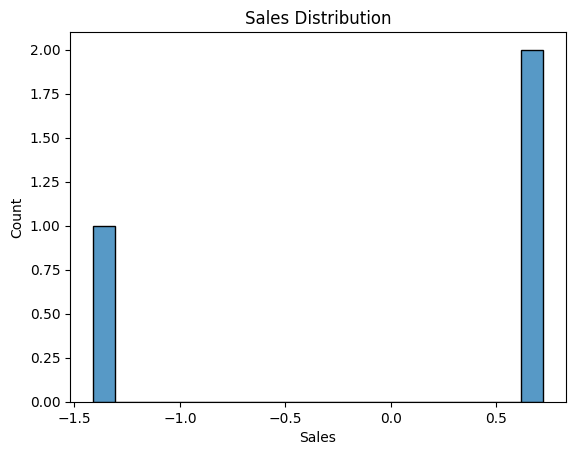

In [58]:
# Exploratory Data Analysis (EDA) - Sales Distribution
sns.histplot(data['Sales'], bins=20)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()


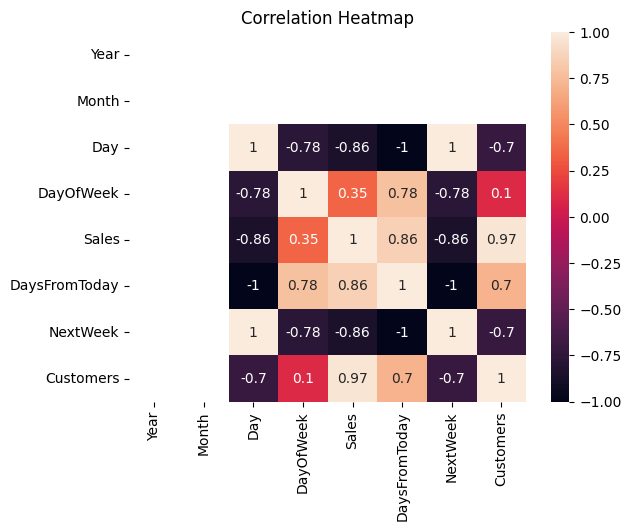

In [59]:
# Correlation Analysis - heatmap to see feature correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
# Split Data into Features (X) and Target (y)
X = data.drop('Sales', axis=1)
y = data['Sales']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# ... (your existing code) ...

# Convert DateTime features to numerical representation before training
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = pd.to_numeric(X_train[col])
    X_test[col] = pd.to_numeric(X_test[col])  # Apply the same transformation to X_test

# Model Training - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [64]:
# Predictions
y_pred = model.predict(X_test)

In [65]:
# Evaluation
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')

MAE: 0.61
MSE: 0.37
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [66]:
# Save the model for deployment
import pickle
with open('sales_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [67]:
print("Model saved as 'sales_model.pkl'")

Model saved as 'sales_model.pkl'
